## Final Project Submission

Please fill out:
* Student name: Ian Kiptoo
* Student pace: Full time Remote
* Scheduled project review date/time: 
* Instructor name: Asha Dean
* Blog post URL:


In [2]:
# Your code here - remember to use markdown cells for comments as well!

# 1.  Introduction
## 1.1 Overview
This project will entail using exploratory data analysis (EDA) to try and come up with useful insights that will be used by Microsoft to make informed bussiness decisions.
This is in regard to entering into a new market of origanal video production.

## 1.2 Business Understanding

Microsoft aims to gain a foothold in the film industry by launching its own film studio. However, lacking experience in film production, Microsoft sought to understand successful films to inform its strategy. By conducting exploratory data analysis (EDA), the project aims to identify key factors contributing to box office success, such as genre preferences, demographics and key responses. The insights gained will enable Microsoft to make informed decisions about the types of films to be released based on market trends and audience preferences. Ultimately, this move is intended to make Microsoft Movie Studios more competitive in the changing entertainment market.

### Key inquiries:

1.Does the total number of films produced relate to the total gross income?

2.How is rating related to movie duration?

3.How do franchise and sequel films perform financially?

4.What insights can we gain from the performance of other production studios?

5.Is it financially viable to acquire a smaller, pre-existing stud

## 1.3 Revieving my current working directory





In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4298-8E60

 Directory of C:\Users\Ian\Documents\fraiton\dsc-data-science-env-config\dsc-phase-1-project-v2-4

03/19/2024  19:06    <DIR>          .
03/19/2024  19:06    <DIR>          ..
03/18/2024  19:27               163 .canvas
03/18/2024  19:27                84 .gitignore
03/18/2024  19:44    <DIR>          .ipynb_checkpoints
03/18/2024  19:27         1,425,341 awesome.gif
03/18/2024  19:27             1,846 CONTRIBUTING.md
03/18/2024  22:13                 0 im.db
03/18/2024  19:27             1,357 LICENSE.md
03/18/2024  19:27           107,563 movie_data_erd.jpeg
03/18/2024  19:27            22,781 README.md
03/19/2024  19:06           133,974 student.ipynb
03/18/2024  22:20    <DIR>          zippedData
               9 File(s)      1,693,109 bytes
               4 Dir(s)  46,687,154,176 bytes free


## 1.4 Importing all the relevant Libraries

In [4]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Data Understanding and Data Analysis

## 2.1 Data understanding

### 2.1.1 Data sources

### 1.Box Office Mojo
This is an American website that provides box office data for movies. The site was founded in 1988 by Brandon Gray, and was bought in by IMDb in 2008. IMDb is itself ownwed by Amazon.
It specificy offers information about 

### 2. IMDB (Internet Movie Database)
IMDB is one of the most comprehensive database for films,television series, podcasts, home videos, video games, and streaming content online.This includes cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. It was founded in 1990, and moved to the web in 1993.

### 3. Rotten Tomatoes
Rotten Tomatoes is an American review aggregation website for film and television. It collects reviews from critics and audiences and assigns a "Tomatometer" score to movies based on the percentage of positive reviews. It also provides audience scores and reviews.

### 4. TheMovieDB
TheMovieDB (TMDB) is a user-generated database that provides information about movies, TV shows, and actors. It offers similar information to IMDB, including movie details, cast and crew information, user ratings, and more.

### 5. The Numbers
The numbers is a film industry data website that tracks box office revenue in a systematic, algorithimic way. 
The company also engagges in doing research and comes up income with forecasts of film projects.




### 2.1.2 Reading the data 

In [5]:
# Imported our various CSV's to understand contents as well

box_office_mojo_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
rotten_tomatoes_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter = '\t')
themoviedb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
the_numbers_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

### 2.1.3 Exploring the Data
Examination of the data structure and content. Understanding the data types, dimensions, and any initial patterns or insights.

### 1. Box office Mojo

In [6]:
box_office_mojo_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
box_office_mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
# Calculate the total number of missing values in each column
missing_values_total = box_office_mojo_df.isnull().sum()

# Display the total number of missing values
print("Total missing values in each column:")
print(missing_values_total)

Total missing values in each column:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


This data has a total of 5 columns and 3387 rows.
The columns names include title, studio, domestric_gross, foreign_gross and year.
In this data set we also have missing values. Three columns contains missing values, that is
studio with 5, domestric_gross with 28 and foreign_gross with 1350.

### Data types

### title 
This column contains object data type, likely representing titles of movies or similar categorical information.
### studio
Similarly, this column also contains object data type, likely representing the studios associated with the movies.
### domestic_gross
This column contains float64 data type, indicating numerical values for domestic gross earnings of movies.
### foreign_gross
This column contains object data type, which is unexpected for representing monetary values. It might need further investigation as it should ideally be of a numeric data type.
### year
This column contains int64 data type, representing the years associated with the movies.

Will need to do further analysis inorder to deal with the missing values and the foreign_gross column that is of type object which seems not to be what we expected of monetary terms.








### 2.Rotten Tomatoes

In [9]:
rotten_tomatoes_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [11]:
# Calculate the total number of missing values in each column
missing_values_total = rotten_tomatoes_df.isnull().sum()

# Display the total number of missing values
print("Total missing values in each column:")
print(missing_values_total)

Total missing values in each column:
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


This data set contains 12 columns and 1560 rows.
The column names include id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime and studio.
In total we have 11 columns that contains missing values.
The only column that does not contain missing values is the id column.

The synopsis column has 62 missing values, the rating column has 3 missing values, the genre column has 8 missing values, the director column has 199 missing values, the writer column has 449 missing values, the theater_date column has 359 missing values, the dvd_date column has 359 missing values, the currency column has 1220 missing values, the box_office column has 1220 missing values, the runtime column has 30 missing values, and the studio column has 1066 missing values.

### Data types
### synopsis 
This column likely contains textual data and may be represented as an object data type.

### rating 
This column may represent categorical data such as movie ratings (e.g., PG, PG-13, R) and could be represented as an object data type.
### genre
This column may also represent categorical data indicating the genre of movies (e.g., Action, Comedy) and could be represented as an object data type.
### director
This column likely contains names of movie directors and may be represented as an object data type.
### writer
Similar to the director column, this column likely contains names of movie writers and may be represented as an object data type.
### theater_date and dvd_date
These columns may represent dates and could be represented as datetime data types.
### currency, box_office, and runtime
These columns may represent numerical data and could be represented as appropriate numerical data types (e.g., float64 for currency and box office, int64 for runtime).
### studio
This column may represent categorical data indicating the movie studios and could be represented as an object data type.

Gennerally the data types are what is expected, but on the other hand this data set contains a lot of missing values hence the need to do further analysis.

### 3. TheMovieDB

In [12]:
themoviedb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
# removing the Unnamed column
themoviedb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)

In [14]:
themoviedb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [15]:
# Calculate the total number of missing values in each column
missing_values_total = themoviedb_df.isnull().sum()

# Display the total number of missing values
print("Total missing values in each column:")
print(missing_values_total)

Total missing values in each column:
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


This data set contains 9 columns and 26517 rows.
The column names include genre_ids, id, original_language, originality_title, popularity, release_date, title, vote_average and vote_count.
This data set does not contain any missing values.

### Data types
### genre_ids
This column contains object data type, likely representing genre IDs associated with movies.
### id
This column contains int64 data type, representing unique identifiers for movies.
### original_language
This column contains object data type, indicating the original language of movies.
### original_title
This column contains object data type, likely representing the original titles of movies.
### popularity
This column contains float64 data type, representing popularity scores of movies.
### release_date
This column contains object data type, representing release dates of movies. It will be convinent to convert it to datetime data type for further analysis.
### title
This column contains object data type, representing the titles of movies.
### vote_average
This column contains float64 data type, representing average ratings of movies.
### vote_count
This column contains int64 data type, representing the number of votes cast for movies.


This data set does not have major issues and may be convient to use it.

### 4.The Numbers

In [16]:
the_numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [17]:
the_numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [18]:
# Calculate the total number of missing values in each column
missing_values_total = the_numbers_df.isnull().sum()

# Display the total number of missing values
print("Total missing values in each column:")
print(missing_values_total)

Total missing values in each column:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


This data set contains 6 columns and 5782 rows.
The column names include id, release_date, movie, production_budget, domestic_gross and worlwide_gross.
Also this data does not contain any missing values.

### Data types
### id 
This column contains int64 data type, representing unique identifiers for movies.
### release_date
This column contains object data type, representing release dates of movies. It's convinent to convert it to datetime data type for further analysis.
### movie
This column contains object data type, likely representing the titles of movies.
### production_budget
This column contains object data type, which is unexpected for representing monetary values. It might need further investigation as it should ideally be of a numeric data type.
### domestic_gross 
This column contains object data type, which is unexpected for representing monetary 
### values
It might need further investigation as it should ideally be of a numeric data type.
### worldwide_gross
This column contains object data type, which is unexpected for representing monetary values. It might need further investigation as it should ideally be of a numeric data type.

This data requires further analysis inorder to determine the column types.

# 2.2 Data Preparation and Analysis

Should be able to deal with missing values and data types issues and do the necessary analysis.

### 1. Box Office Mojo

In [19]:
# Getting the shape of the data
box_office_mojo_df.shape

(3387, 5)

In [20]:
# Getting frequency of unique values
box_office_mojo_df.value_counts()

title                           studio   domestic_gross  foreign_gross  year
xXx: The Return of Xander Cage  Par.     44900000.0      301200000      2017    1
I Am Number Four                BV       55100000.0      94800000       2011    1
How to Be Single                WB (NL)  46800000.0      65500000       2016    1
How to Train Your Dragon        P/DW     217600000.0     277300000      2010    1
How to Train Your Dragon 2      Fox      177000000.0     444500000      2014    1
                                                                               ..
Source Code                     Sum.     54700000.0      92600000       2011    1
South of the Border             CLS      199000.0        70800          2010    1
Southpaw                        Wein.    52400000.0      39500000       2015    1
Southside with You              RAtt.    6300000.0       208000         2016    1
'71                             RAtt.    1300000.0       355000         2015    1
Length: 2007, dtype: 

In [21]:
# Changing the data type of foreign_gross from str to int
box_office_mojo_df['foreign_gross'] = box_office_mojo_df['foreign_gross'].str.replace(',', '')
box_office_mojo_df['foreign_gross'] = pd.to_numeric(box_office_mojo_df['foreign_gross'])
box_office_mojo_df['foreign_gross'].head()

0    652000000.0
1    691300000.0
2    664300000.0
3    535700000.0
4    513900000.0
Name: foreign_gross, dtype: float64

In [22]:
# Dealing with missing values
missing_values_total = box_office_mojo_df.isnull().sum()

# Display the total number of missing values
print("Total missing values in each column:")
print(missing_values_total)

Total missing values in each column:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [23]:
# Dealing with missing values
missing_studio_rows = box_office_mojo_df[box_office_mojo_df["studio"].isna()]
missing_studio_rows

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000.0,2010
555,Fireflies in the Garden,NaN,70600.0,3300000.0,2011
933,Keith Lemon: The Film,NaN,NaN,4000000.0,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000.0,2017


Sice the rows are few and we cannot just replace a studio with the mode or the mean value of the data, since we do not actually know the name the best practice is to drop the missing values. Thi swill ensure that the quality of the data remains intact.

In [24]:
missing_domestic_rows = box_office_mojo_df[box_office_mojo_df["domestic_gross"].isna()]
missing_domestic_rows

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000.0,2010
302,White Lion,Scre.,NaN,99600.0,2010
306,Badmaash Company,Yash,NaN,64400.0,2010
327,Aashayein (Wishes),Relbig.,NaN,3800.0,2010
537,Force,FoxS,NaN,4800000.0,2011
713,Empire of Silver,NeoC,NaN,19000.0,2011
871,Solomon Kane,RTWC,NaN,19600000.0,2012
928,The Tall Man,Imag.,NaN,5200000.0,2012
933,Keith Lemon: The Film,NaN,NaN,4000000.0,2012


In [25]:
missing_foreign_rows = box_office_mojo_df[box_office_mojo_df["foreign_gross"].isna()]
missing_foreign_rows

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [26]:
## Remove null values from columns
box_office_mojo_df.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'], inplace=True)
box_office_mojo_df.shape

(2007, 5)

In [27]:
# Checking that there are no null values
box_office_mojo_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### Observation and insights
Do the movie production and revenue relate?

In [28]:
# finding studios with most production and the one with least production
studio_counts = box_office_mojo_df["studio"].value_counts()
print(studio_counts.head())
print(studio_counts.tail())

Uni.    144
Fox     134
WB      130
Sony    105
BV      104
Name: studio, dtype: int64
NFC      1
BBC      1
IW       1
Viv.     1
Pala.    1
Name: studio, dtype: int64


In [29]:
# Creating a column with total pay
box_office_mojo_df["total_pay"] = box_office_mojo_df["domestic_gross"] + box_office_mojo_df["foreign_gross"]

In [30]:
box_office_mojo_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_pay
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [31]:
# Grouping studio by total_pay
studio_total_pay = box_office_mojo_df.groupby('studio')['total_pay'].sum().sort_values(ascending=False)

print(studio_total_pay)

studio
BV              4.419038e+10
Fox             3.098037e+10
WB              3.079150e+10
Uni.            2.974681e+10
Sony            2.240472e+10
                    ...     
Darin Southa    9.840000e+04
ICir            7.960000e+04
ITL             5.290000e+04
WOW             4.940000e+04
Crnth           3.830000e+04
Name: total_pay, Length: 172, dtype: float64


In [32]:
# Comparing with the number of films produced.
# Merge studio_total_pay with studio_counts
merged_data = pd.concat([studio_total_pay, studio_counts], axis=1, keys=['Total Pay', 'Counts'])

print(merged_data.head(20))
print(merged_data.tail(10))

            Total Pay  Counts
BV       4.419038e+10     104
Fox      3.098037e+10     134
WB       3.079150e+10     130
Uni.     2.974681e+10     144
Sony     2.240472e+10     105
Par.     1.944420e+10      94
WB (NL)  1.031410e+10      44
LGF      8.467471e+09      87
LG/S     5.318924e+09      37
P/DW     5.076500e+09      10
Wein.    4.095903e+09      69
SGem     3.140162e+09      34
WGUSA    2.778054e+09      25
Focus    2.496769e+09      51
FoxS     2.474688e+09      49
Sum.     2.284971e+09      14
CL       1.898686e+09      22
Rela.    1.715417e+09      28
TriS     1.713055e+09      19
STX      1.474200e+09      22
              Total Pay  Counts
Icar.          177700.0       1
AGF            176800.0       1
NYer           128800.0       1
FOAK           124300.0       1
IVP            112100.0       1
Darin Southa    98400.0       1
ICir            79600.0       1
ITL             52900.0       1
WOW             49400.0       1
Crnth           38300.0       1


### Visualization

In [33]:
type(merged_data)

pandas.core.frame.DataFrame

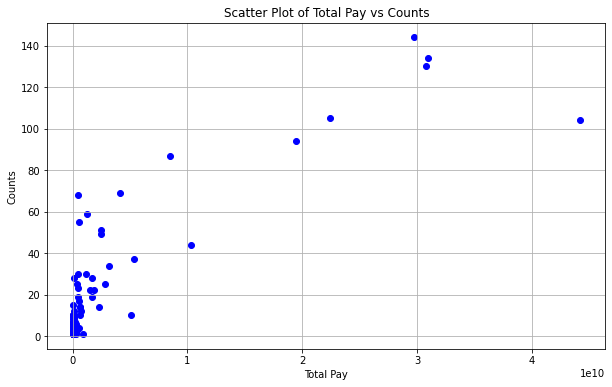

In [34]:
# Plotting scatter plot for Total Pay and Counts
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Total Pay'], merged_data['Counts'], color='blue')
plt.xlabel('Total Pay')
plt.ylabel('Counts')
plt.title('Scatter Plot of Total Pay vs Counts')
plt.grid(True)
plt.show()

In [35]:
# Correlation
# Calculate the correlation coefficient between 'Total Pay' and 'Counts'
correlation_coefficient = merged_data['Total Pay'].corr(merged_data['Counts'])
correlation_coefficient


0.8623473337335764

### Insight
With a correlation coefficient of 0.86234, there is a high degree of linear dependency between total pay and the number of films produced by the studios. This insight implies that changes in one variable will likely result in predictable changes in the other variable. This implies that with increased production there will be an increase in the total revenue.

However, it's essential to note that correlation does not imply causation. While a correlation coefficient of 0.86234 indicates a strong association between the variables, it does not necessarily mean that one variable causes the other to change. There may be other underlying factors or variables influencing the observed relationship.
### Recommendation
Therefore, while a positive correlation of 0.86234 provides valuable insights into the relationship between the variables, further analysis and experimentation may be required to establish causality and make informed decisions.


### 2.Rotten Tomatoes

For this data I will be interested in answering the relation between different genre of movies and revene.
Will like to know if there are specific profitable genres of movies.

In [36]:
# Getting the shape of the data
rotten_tomatoes_df.shape

(1560, 12)

In [37]:
# Dealing with missing values
missing_values_total = rotten_tomatoes_df.isnull().sum()

# Display the total number of missing values
print("Total missing values in each column:")
print(missing_values_total)

Total missing values in each column:
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


In [38]:
rotten_tomatoes_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


### Interested in the rating and runtime columns

In [39]:
rotten_tomatoes_df["runtime"]

0       104 minutes
1       108 minutes
2       116 minutes
3       128 minutes
4       200 minutes
           ...     
1555    106 minutes
1556     88 minutes
1557    111 minutes
1558    101 minutes
1559     94 minutes
Name: runtime, Length: 1560, dtype: object

In [40]:
rotten_tomatoes_df["rating"]

0        R
1        R
2        R
3        R
4       NR
        ..
1555     R
1556    PG
1557     G
1558    PG
1559     R
Name: rating, Length: 1560, dtype: object

In [41]:
rotten_tomatoes_df["rating"]


0        R
1        R
2        R
3        R
4       NR
        ..
1555     R
1556    PG
1557     G
1558    PG
1559     R
Name: rating, Length: 1560, dtype: object

In [42]:
# getting the null values for the genre
rotten_tomatoes_df["runtime"].isnull().sum()

30

In [43]:
# getting the null values for the box_office
rotten_tomatoes_df["rating"].isnull().sum()

3

In [44]:
# obtaining random sample of the values in the box_office
random_samples = rotten_tomatoes_df["runtime"].sample(10) 
random_samples

1134    104 minutes
225      87 minutes
151      98 minutes
707     120 minutes
1264     88 minutes
203      91 minutes
1533     93 minutes
598     145 minutes
1405     90 minutes
317     120 minutes
Name: runtime, dtype: object

In [45]:
# Dropping the missing values
rotten_tomatoes_df.dropna(subset=['rating', 'runtime'], inplace=True)
rotten_tomatoes_df.shape


(1530, 12)

In [46]:
rotten_tomatoes_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [47]:
unique_ratings = rotten_tomatoes_df["rating"].value_counts()
unique_ratings

R        519
NR       482
PG       239
PG-13    232
G         57
NC17       1
Name: rating, dtype: int64

In [48]:
# Extract numerical part in runtime and convert to numeric
rotten_tomatoes_df['runtime'] = rotten_tomatoes_df['runtime'].str.extract('(\d+)').astype(float)

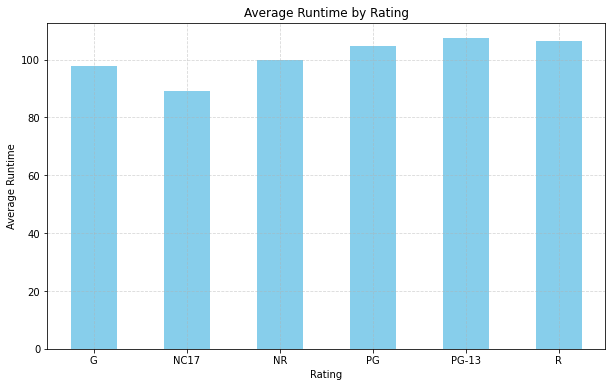

In [53]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
rotten_tomatoes_df.groupby('rating')['runtime'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Runtime by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Runtime')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


From the bar plot, pG-13 has the highest of the avearage runtime while NC17 has the lowest.

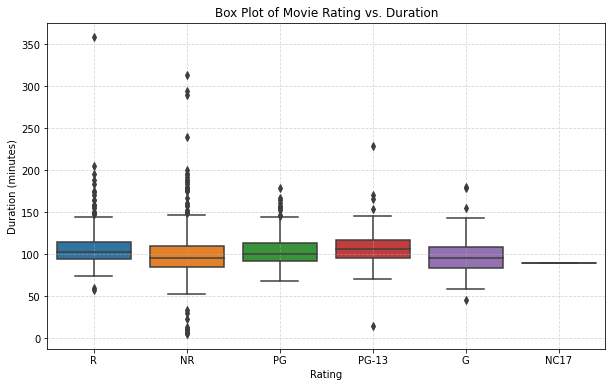

In [52]:
# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='runtime', data=rotten_tomatoes_df)
plt.title('Box Plot of Movie Rating vs. Duration')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

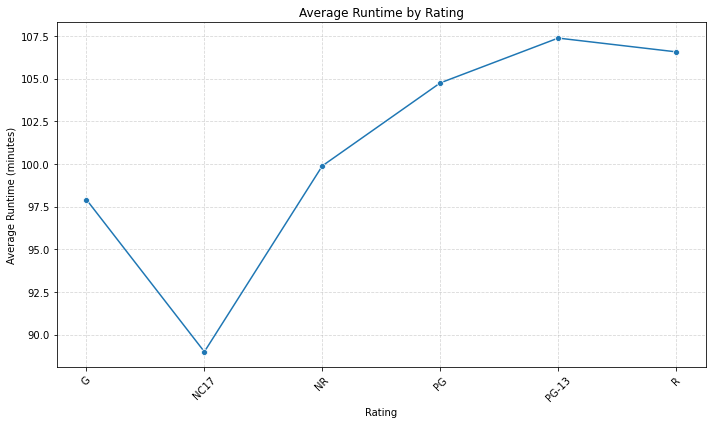

In [55]:
# Grouping data by 'rating' and calculating the average 'runtime'
average_runtimes = rotten_tomatoes_df.groupby('rating')['runtime'].mean().reset_index()

# Plotting the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_runtimes, x='rating', y='runtime', marker='o', linestyle='-')
plt.title('Average Runtime by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Runtime (minutes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Recommendation
The insights gained from the three plots—bar, box, and line—offer invaluable guidance for Microsoft in aligning movie content with audience preferences. The bar plot, depicting average runtimes for each movie rating category, aids in understanding audience expectations, enabling Microsoft to curate diverse content offerings that resonate with viewers. Similarly, the distribution of movie runtimes across rating categories, as illustrated in the box plot, provides insights into audience preferences, including the identification of outliers. By analyzing these outliers, Microsoft can refine its content curation strategies to ensure that its platforms offer a diverse range of content that appeals to a broad audience. Integrating these insights into Microsoft's platforms can enhance user experiences by providing personalized content recommendations that cater to individual preferences. Furthermore, analyzing the trend between movie ratings and durations, as depicted in the line plot, allows Microsoft to tailor its content offerings to specific target audiences, ensuring alignment with diverse viewer preferences. By incorporating these insights into its platforms, Microsoft can improve content curation and user satisfaction, solidifying its position in the entertainment industry.

### 3. The MovieDB